In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('loan_data_set.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
data['LoanAmount'].skew()

2.677551679256059

<Axes: ylabel='LoanAmount'>

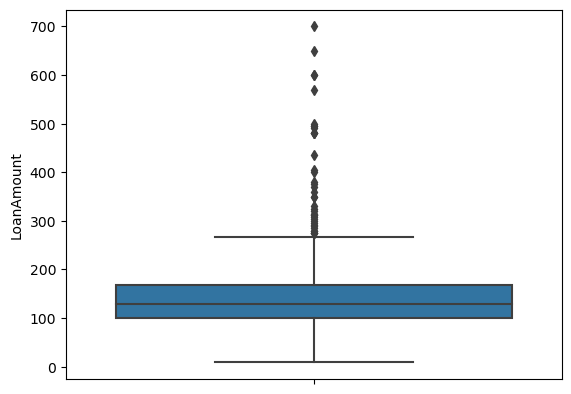

In [5]:
import seaborn as sns
sns.boxplot(y = data['LoanAmount'])

## Outlier Treatment: Either removing the outlier from the data or replace the outlier values with some other values is called as outlier treatment.

#### 1st Outlier Treatment Method:

#### Quantile Based Flooring and Capping Methods

In [6]:
arr = np.array([10, 25, 34, 67, 75, 48, 96, 29])
arr

array([10, 25, 34, 67, 75, 48, 96, 29])

In [7]:
## Replace the values divisible by 5 in the with 500 using np.where()

#np.where(condition, value you want replace with, name of the array)

np.where(arr % 5 == 0, 500, arr)

array([500, 500,  34,  67, 500,  48,  96,  29])

In [8]:
## replace all the values divisible by 3 in the array with 950

np.where(arr % 3 == 0, 950, arr)

array([ 10,  25,  34,  67, 950, 950, 950,  29])

#### Let's consider the LoanAmount Column from the data. When the value inside the LoanAmount column is greater than 90% value and any value less than 10% we will replace that value.

<Axes: ylabel='LoanAmount'>

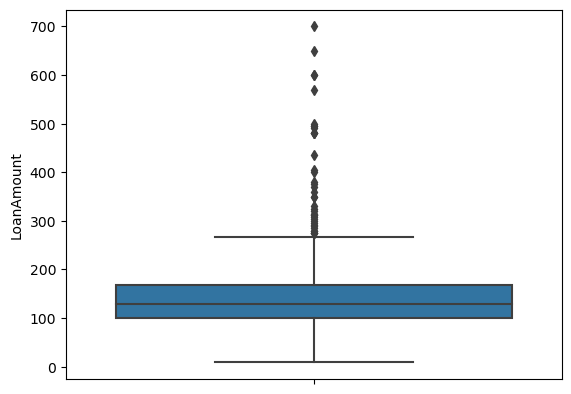

In [9]:
sns.boxplot(y = data['LoanAmount'])

## Step 1 : Finding out 90% and 10% value from the Loan Amount column

In [10]:
data['LoanAmount'].quantile(0.90)

235.79999999999995

In [11]:
data['LoanAmount'].quantile(0.10)

71.0

In [12]:
data['LoanAmount'] = np.where(data['LoanAmount'] > 235, 235, data['LoanAmount'])
data['LoanAmount'] = np.where(data['LoanAmount'] < 71, 71, data['LoanAmount'])

<Axes: ylabel='LoanAmount'>

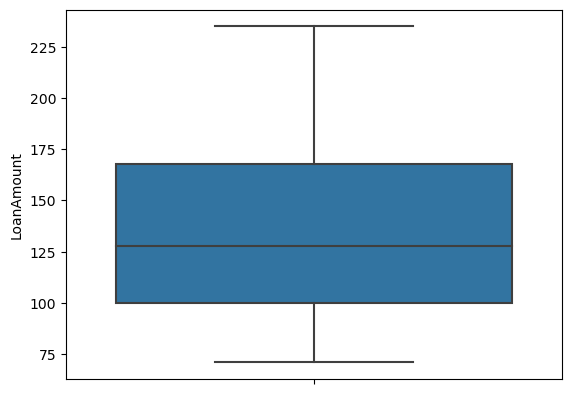

In [13]:
sns.boxplot(y = data['LoanAmount'])

In [14]:
data['LoanAmount'].skew()

0.6231463951818582

## You decide to do a strict outlier Treatment

In [16]:
data = pd.read_csv('loan_data_set.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<Axes: ylabel='LoanAmount'>

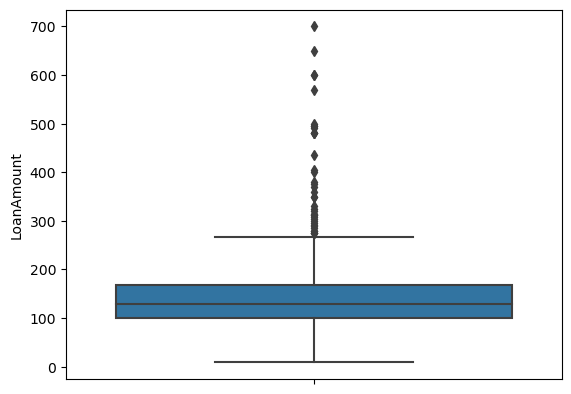

In [17]:
sns.boxplot(y = data['LoanAmount'])

In [18]:
data['LoanAmount'].quantile(0.80)

182.0

In [20]:
data['LoanAmount'].quantile(0.20)

95.0

In [21]:
data['LoanAmount'] = np.where(data['LoanAmount'] > 182, 182, data['LoanAmount'])
data['LoanAmount'] = np.where(data['LoanAmount'] < 95, 95, data['LoanAmount'])

<Axes: ylabel='LoanAmount'>

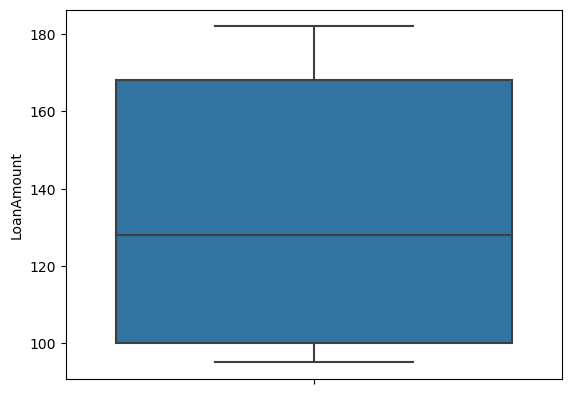

In [22]:
sns.boxplot(y = data['LoanAmount'])

In [23]:
data['LoanAmount'].skew()

0.3198740061809601

## Method 2 : Outlier Trimming

<Axes: ylabel='CoapplicantIncome'>

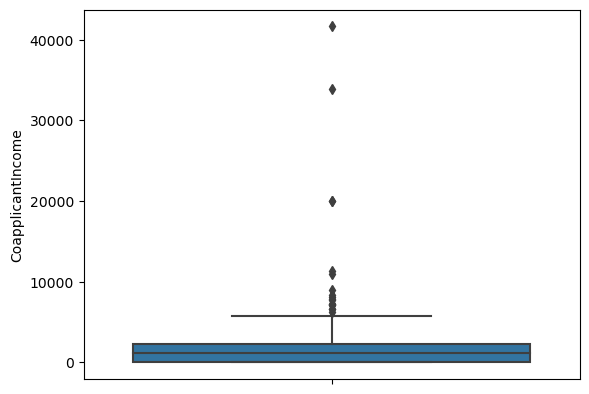

In [24]:
sns.boxplot(y = data['CoapplicantIncome'])

In [25]:
data['CoapplicantIncome'].skew()

7.491531216657306

## Step 1 : To calculate 75% value and 25% values

In [26]:
data['CoapplicantIncome'].quantile(0.75)

2297.25

In [27]:
data['CoapplicantIncome'].quantile(0.25)

0.0

## Step 2: Find the index in the data where the values are >75% value and < 25% value

In [29]:
x = data[(data['CoapplicantIncome'] < 0) | (data['CoapplicantIncome'] > 2297)].index
x

Int64Index([  3,   5,   7,   9,  12,  13,  19,  21,  24,  30,
            ...
            579, 581, 585, 590, 593, 600, 601, 603, 605, 606],
           dtype='int64', length=154)

## Step 3 : Drop the values present at the indexes obtained from step 2

In [32]:
data['CoapplicantIncome'] = data['CoapplicantIncome'].drop(x)

In [33]:
data['CoapplicantIncome'].skew()

0.6834089713639013

<Axes: ylabel='CoapplicantIncome'>

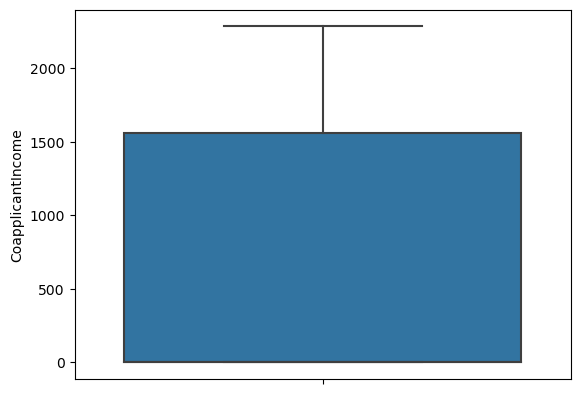

In [34]:
sns.boxplot(y = data['CoapplicantIncome'])

## Method 3 : Log Transformation Method

In [35]:
np.log(10)

2.302585092994046

In [36]:
np.log(25)

3.2188758248682006

<Axes: ylabel='ApplicantIncome'>

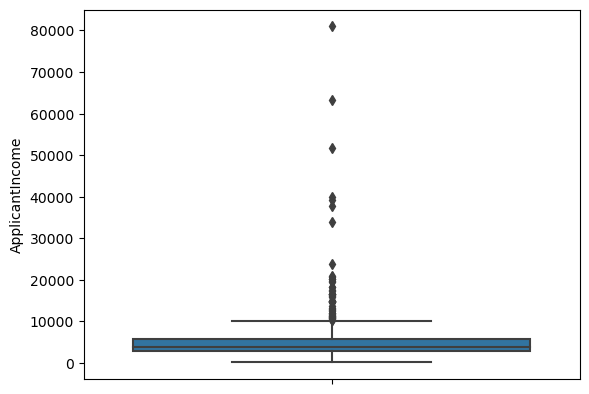

In [37]:
sns.boxplot(y = data['ApplicantIncome'])

In [38]:
data['ApplicantIncome'].skew()

6.539513113994625

In [39]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,95.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,NaN,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [40]:
np.log(5849)

8.674025985443025

In [41]:
np.log(4583)

8.430109084509125

In [42]:
data['ApplicantIncome'] = np.log(data['ApplicantIncome'])
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,8.674026,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,8.430109,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,8.006368,0.0,95.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,7.856707,NaN,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,8.699515,0.0,141.0,360.0,1.0,Urban,Y


<Axes: ylabel='ApplicantIncome'>

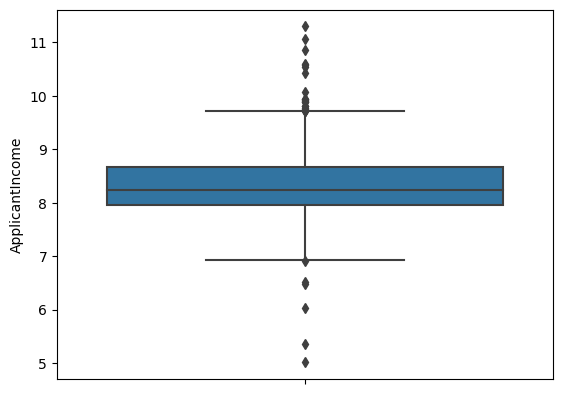

In [43]:
sns.boxplot(y = data['ApplicantIncome'])

In [44]:
data['ApplicantIncome'].skew()

0.4795799780016222

## Conclusion is : Log Transformation Method does not fit Applicant Income column well. To treat outliers from the Applicant Income column use some other method

## Load the tips dataset

In [45]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: >

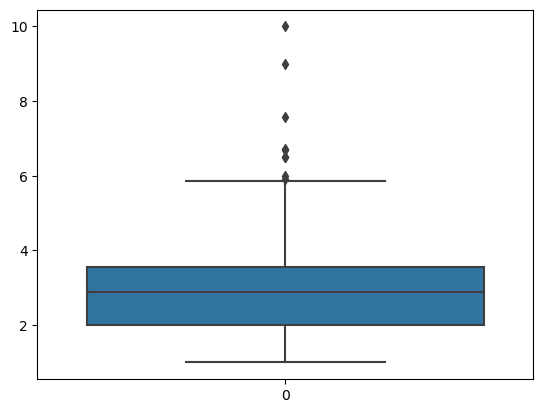

In [46]:
sns.boxplot(tips['tip'])

## Method 4 : Replacing the outlier values with the median of the column

## Step 1 : To calculate 85% of the data, 15% of the data and median (50%) of the data

In [52]:
tips['tip'].quantile(0.80)

3.18

In [48]:
tips['tip'].quantile(0.15)

1.7389999999999999

In [49]:
tips['tip'].median()

2.9

## In the tip, any value greater than 4.1 or any value less than 1.7, replace all such values with 2.9

In [53]:
tips['tip'] = np.where(tips['tip'] > 3.18, 2.9, tips['tip'])
tips['tip'] = np.where(tips['tip'] < 1.7, 2.9, tips['tip'])

<Axes: >

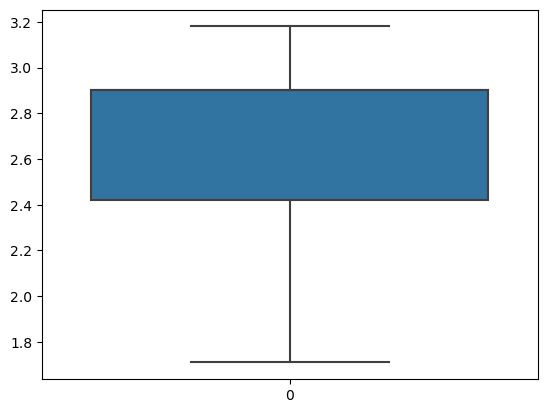

In [54]:
sns.boxplot(tips['tip'])

## Method 5 : IQR method

In [56]:
data = pd.read_csv('loan_data_set.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<Axes: >

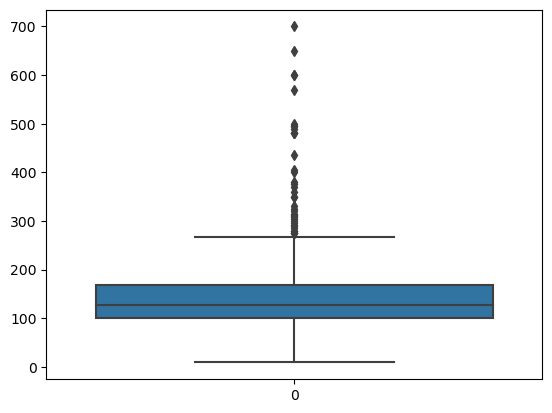

In [58]:
sns.boxplot(data['LoanAmount'])

### Step 1 : Calc Q1, Q3 and IQR

In [61]:
import warnings
warnings.filterwarnings('ignore')

In [64]:
q1 = data.quantile(0.25)
q1

ApplicantIncome      2877.5
CoapplicantIncome       0.0
LoanAmount            100.0
Loan_Amount_Term      360.0
Credit_History          1.0
Name: 0.25, dtype: float64

In [65]:
q3 = data.quantile(0.75)
q3

ApplicantIncome      5795.00
CoapplicantIncome    2297.25
LoanAmount            168.00
Loan_Amount_Term      360.00
Credit_History          1.00
Name: 0.75, dtype: float64

In [66]:
IQR = q3 - q1
IQR

ApplicantIncome      2917.50
CoapplicantIncome    2297.25
LoanAmount             68.00
Loan_Amount_Term        0.00
Credit_History          0.00
dtype: float64

## Step 2 : Find the Upper Whisker and the Lower Whisker of the data

In [67]:
lw = q1 - 1.5 * IQR
lw

ApplicantIncome     -1498.750
CoapplicantIncome   -3445.875
LoanAmount             -2.000
Loan_Amount_Term      360.000
Credit_History          1.000
dtype: float64

In [69]:
uw = q3 + 1.5 * IQR
uw

ApplicantIncome      10171.250
CoapplicantIncome     5743.125
LoanAmount             270.000
Loan_Amount_Term       360.000
Credit_History           1.000
dtype: float64

## Step 3 : Replace the outlier with the IQR values

In [70]:
data['ApplicantIncome'] = np.where(data['ApplicantIncome'] > 10171, 5795, data['ApplicantIncome'])
data['ApplicantIncome'] = np.where(data['ApplicantIncome'] < -1498, 2877, data['ApplicantIncome'])

<Axes: >

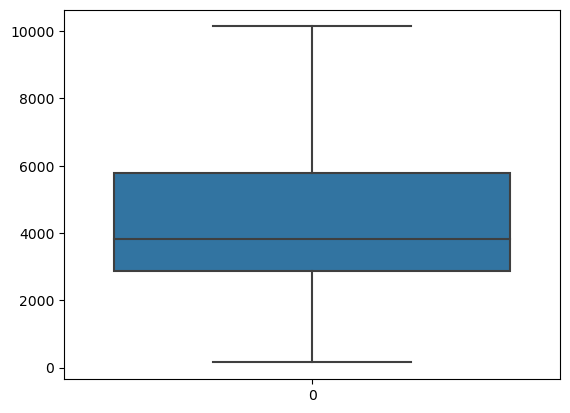

In [71]:
sns.boxplot(data['ApplicantIncome'])

In [72]:
data['ApplicantIncome'].skew()

0.8565976839153009

## 5 Methods  for Outlier Treatment: 

1. Quantile based Flooring and Capping Method
2. Log Transformation Method
3. Trimming Method
4. Median based Method
5. IQR method

## Outlier Treatment is a part of Step 3 of ML process (Data Preprocessing step)